In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

import statsmodels.api as sm
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

## Importing the data

In [94]:
raw_data = pd.read_csv('ml_datasource.csv')

In [95]:
raw_data

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


In [96]:
data = raw_data.copy()

In [97]:
data

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


In [98]:
sns.set()

## Plot Distributions of features

In [99]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
sns.kdeplot(data = data['days_on_platform'] , ax=axes[0,0])
sns.kdeplot(data = data['minutes_watched'] , ax=axes[0,1])
sns.kdeplot(data = data['courses_started'] , ax=axes[1,0])
sns.kdeplot(data = data['practice_exams_started'] , ax=axes[1,1])
sns.kdeplot(data = data['practice_exams_passed'] , ax=axes[2,0])
sns.kdeplot(data = data['minutes_spent_on_exams'] , ax=axes[2,1])

<Axes: xlabel='minutes_spent_on_exams', ylabel='Density'>

## Removing the datapoints which are outliers

In [100]:
filt_data = data[data['minutes_spent_on_exams'] < 1000]

In [101]:
filt_data

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


In [102]:
filt_data = data[data['courses_started'] < 10]
filt_data

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


In [103]:
filt_data = filt_data[filt_data['practice_exams_started'] < 10 ]
filt_data

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


In [104]:
filt_data = filt_data[filt_data['minutes_spent_on_exams'] < 40]
filt_data

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


## Distribution plots of features after removing datapoints which are outliers

In [105]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
sns.kdeplot(data = filt_data['days_on_platform'] , ax=axes[0,0])
sns.kdeplot(data = filt_data['minutes_watched'] , ax=axes[0,1])
sns.kdeplot(data = filt_data['courses_started'] , ax=axes[1,0])
sns.kdeplot(data = filt_data['practice_exams_started'] , ax=axes[1,1])
sns.kdeplot(data = filt_data['practice_exams_passed'] , ax=axes[2,0])
sns.kdeplot(data = filt_data['minutes_spent_on_exams'] , ax=axes[2,1])

<Axes: xlabel='minutes_spent_on_exams', ylabel='Density'>

## Calculating Variance influence factor to check multicollinearity

### Drop non numerical features and target

In [106]:
numerical_filt_data = filt_data.drop(['student_country', 'purchased'], axis = 1)
vif_data = pd.DataFrame() 
vif_data["feature"] = numerical_filt_data.columns
vif_data

,feature
0,days_on_platform
1,minutes_watched
2,courses_started
3,practice_exams_started
4,practice_exams_passed
5,minutes_spent_on_exams


In [107]:
vif_data["VIF"] = [variance_inflation_factor(numerical_filt_data.values, i) for i in range(len(numerical_filt_data.columns))] 

In [108]:
vif_data

,feature,VIF
0,days_on_platform,2.299642
1,minutes_watched,1.636512
2,courses_started,3.082825
3,practice_exams_started,10.403359
4,practice_exams_passed,7.918847
5,minutes_spent_on_exams,3.329361


### VIF is greater than or equal to 5 for the two features - practice_exams_started, practice_exams_passed. Removing them

In [109]:
no_mult_filt_data = filt_data.drop(['practice_exams_started', 'practice_exams_passed'], axis = 1)
no_mult_filt_data

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
0,US,288,358.1,1,15.81,0
1,SG,260,1.7,1,16.00,0
2,TR,260,22.4,1,0.93,0
3,KE,259,18.8,1,14.63,0
4,IN,259,118.0,2,16.48,0
...,...,...,...,...,...,...
17756,EG,0,0.8,1,0.00,0
17757,IN,0,0.1,1,0.00,0
17758,CM,0,7.8,1,0.00,0
17759,CA,0,10.4,1,0.00,0


## Identifying and removing null values

In [110]:
no_mult_filt_data.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [111]:
no_mult_filt_data.loc[no_mult_filt_data['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
311,NaN,88,58.1,1,11.20,1
337,NaN,86,43.0,1,12.96,0
556,NaN,121,241.9,2,21.29,0
806,NaN,64,86.4,1,4.98,0
1097,NaN,72,67.5,1,6.27,0
12363,NaN,84,6.2,1,0.00,0
12633,NaN,78,3.0,1,0.00,0
16946,NaN,11,8.2,1,0.00,0


In [112]:
no_null_filt_data = no_mult_filt_data.fillna(value = 'NAM', axis = 1)

In [113]:
no_null_filt_data

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
0,US,288,358.1,1,15.81,0
1,SG,260,1.7,1,16.0,0
2,TR,260,22.4,1,0.93,0
3,KE,259,18.8,1,14.63,0
4,IN,259,118.0,2,16.48,0
...,...,...,...,...,...,...
17756,EG,0,0.8,1,0.0,0
17757,IN,0,0.1,1,0.0,0
17758,CM,0,7.8,1,0.0,0
17759,CA,0,10.4,1,0.0,0


In [114]:
no_null_filt_data.loc[no_null_filt_data['student_country'] == 'NAM']

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
311,NAM,88,58.1,1,11.2,1
337,NAM,86,43.0,1,12.96,0
556,NAM,121,241.9,2,21.29,0
806,NAM,64,86.4,1,4.98,0
1097,NAM,72,67.5,1,6.27,0
12363,NAM,84,6.2,1,0.0,0
12633,NAM,78,3.0,1,0.0,0
16946,NAM,11,8.2,1,0.0,0


## Creating input and target variables

In [115]:
input = no_null_filt_data.drop(['purchased'], axis = 1)
output = no_null_filt_data['purchased']

In [116]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 365, stratify = output)

### Encoding student_country values as student_country_enc by using Ordinal Encoder. fit_transform() for training data. transform() for testing data. Drop student_country in both.

In [117]:
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = 170)
x_train['student_country_enc'] = enc.fit_transform(x_train['student_country'].to_numpy().reshape(-1, 1))

In [118]:
x_train

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,student_country_enc
5114,IT,227,3.1,1,0.0,74.0
1805,EG,288,10.4,3,0.0,47.0
11969,CA,0,8.6,1,0.0,27.0
3160,IN,262,10.2,1,0.0,71.0
14837,US,45,39.6,1,0.0,156.0
...,...,...,...,...,...,...
17502,TN,3,32.7,1,0.0,150.0
4413,GB,239,2.2,1,0.0,54.0
14984,ZA,42,44.0,1,0.0,164.0
7286,EG,188,11.0,1,0.0,47.0


In [119]:
x_train = x_train.drop(['student_country'], axis = 1)
x_train

,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,student_country_enc
5114,227,3.1,1,0.0,74.0
1805,288,10.4,3,0.0,47.0
11969,0,8.6,1,0.0,27.0
3160,262,10.2,1,0.0,71.0
14837,45,39.6,1,0.0,156.0
...,...,...,...,...,...
17502,3,32.7,1,0.0,150.0
4413,239,2.2,1,0.0,54.0
14984,42,44.0,1,0.0,164.0
7286,188,11.0,1,0.0,47.0


In [120]:
x_test['student_country_enc'] = enc.transform(x_test['student_country'].to_numpy().reshape(-1, 1))
x_test

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,student_country_enc
2018,IL,284,0.7,1,0.0,70.0
13490,ZA,66,130.6,3,0.0,164.0
14708,BD,48,65.4,4,0.0,12.0
5627,US,219,1.4,1,0.0,156.0
15136,CA,38,10.7,1,0.0,27.0
...,...,...,...,...,...,...
5424,ID,222,6.6,1,0.0,68.0
4063,IN,245,125.5,2,0.0,71.0
694,TR,71,47.6,3,10.2,151.0
17742,IN,0,1.2,1,0.0,71.0


In [121]:
x_test = x_test.drop(['student_country'], axis = 1)

In [122]:
x_test

,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,student_country_enc
2018,284,0.7,1,0.0,70.0
13490,66,130.6,3,0.0,164.0
14708,48,65.4,4,0.0,12.0
5627,219,1.4,1,0.0,156.0
15136,38,10.7,1,0.0,27.0
...,...,...,...,...,...
5424,222,6.6,1,0.0,68.0
4063,245,125.5,2,0.0,71.0
694,71,47.6,3,10.2,151.0
17742,0,1.2,1,0.0,71.0


In [123]:
x_train_array = np.asarray(x_train, dtype = 'float')
y_train_array = np.asarray(y_train, dtype = 'int')
x_test_array = np.asarray(x_test, dtype = 'float')
y_test_array = np.asarray(y_test, dtype = 'int')

## Logistic Regression

In [124]:
log_reg = sm.Logit(y_train_array, x_train_array)

In [125]:
log_reg_results = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.156873
         Iterations 10


In [126]:
log_reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14101
Model:                          Logit   Df Residuals:                    14096
Method:                           MLE   Df Model:                            4
Date:                Thu, 15 Feb 2024   Pseudo R-squ.:                  0.4897
Time:                        19:40:09   Log-Likelihood:                -2212.1
converged:                       True   LL-Null:                       -4334.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0691      0.002    -32.223      0.000      -0.073      -0.065
x2             0.0108      0.001     19.236      0.000       0.010       0.012
x3            -0.1995      0.059     -3.357      0.001      -0.316      -0.083
x4            -0.0416      0.010     -4.075      0.000      -0.062      -0.022
x5             0.0027      0.001      4.266      0.000       0.001       0.004
==============================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [127]:
log_reg_pred = log_reg_results.predict(x_test_array)

In [128]:
log_reg_pred = np.round(log_reg_pred, 0)
log_reg_pred

array([0., 0., 0., ..., 0., 1., 0.])

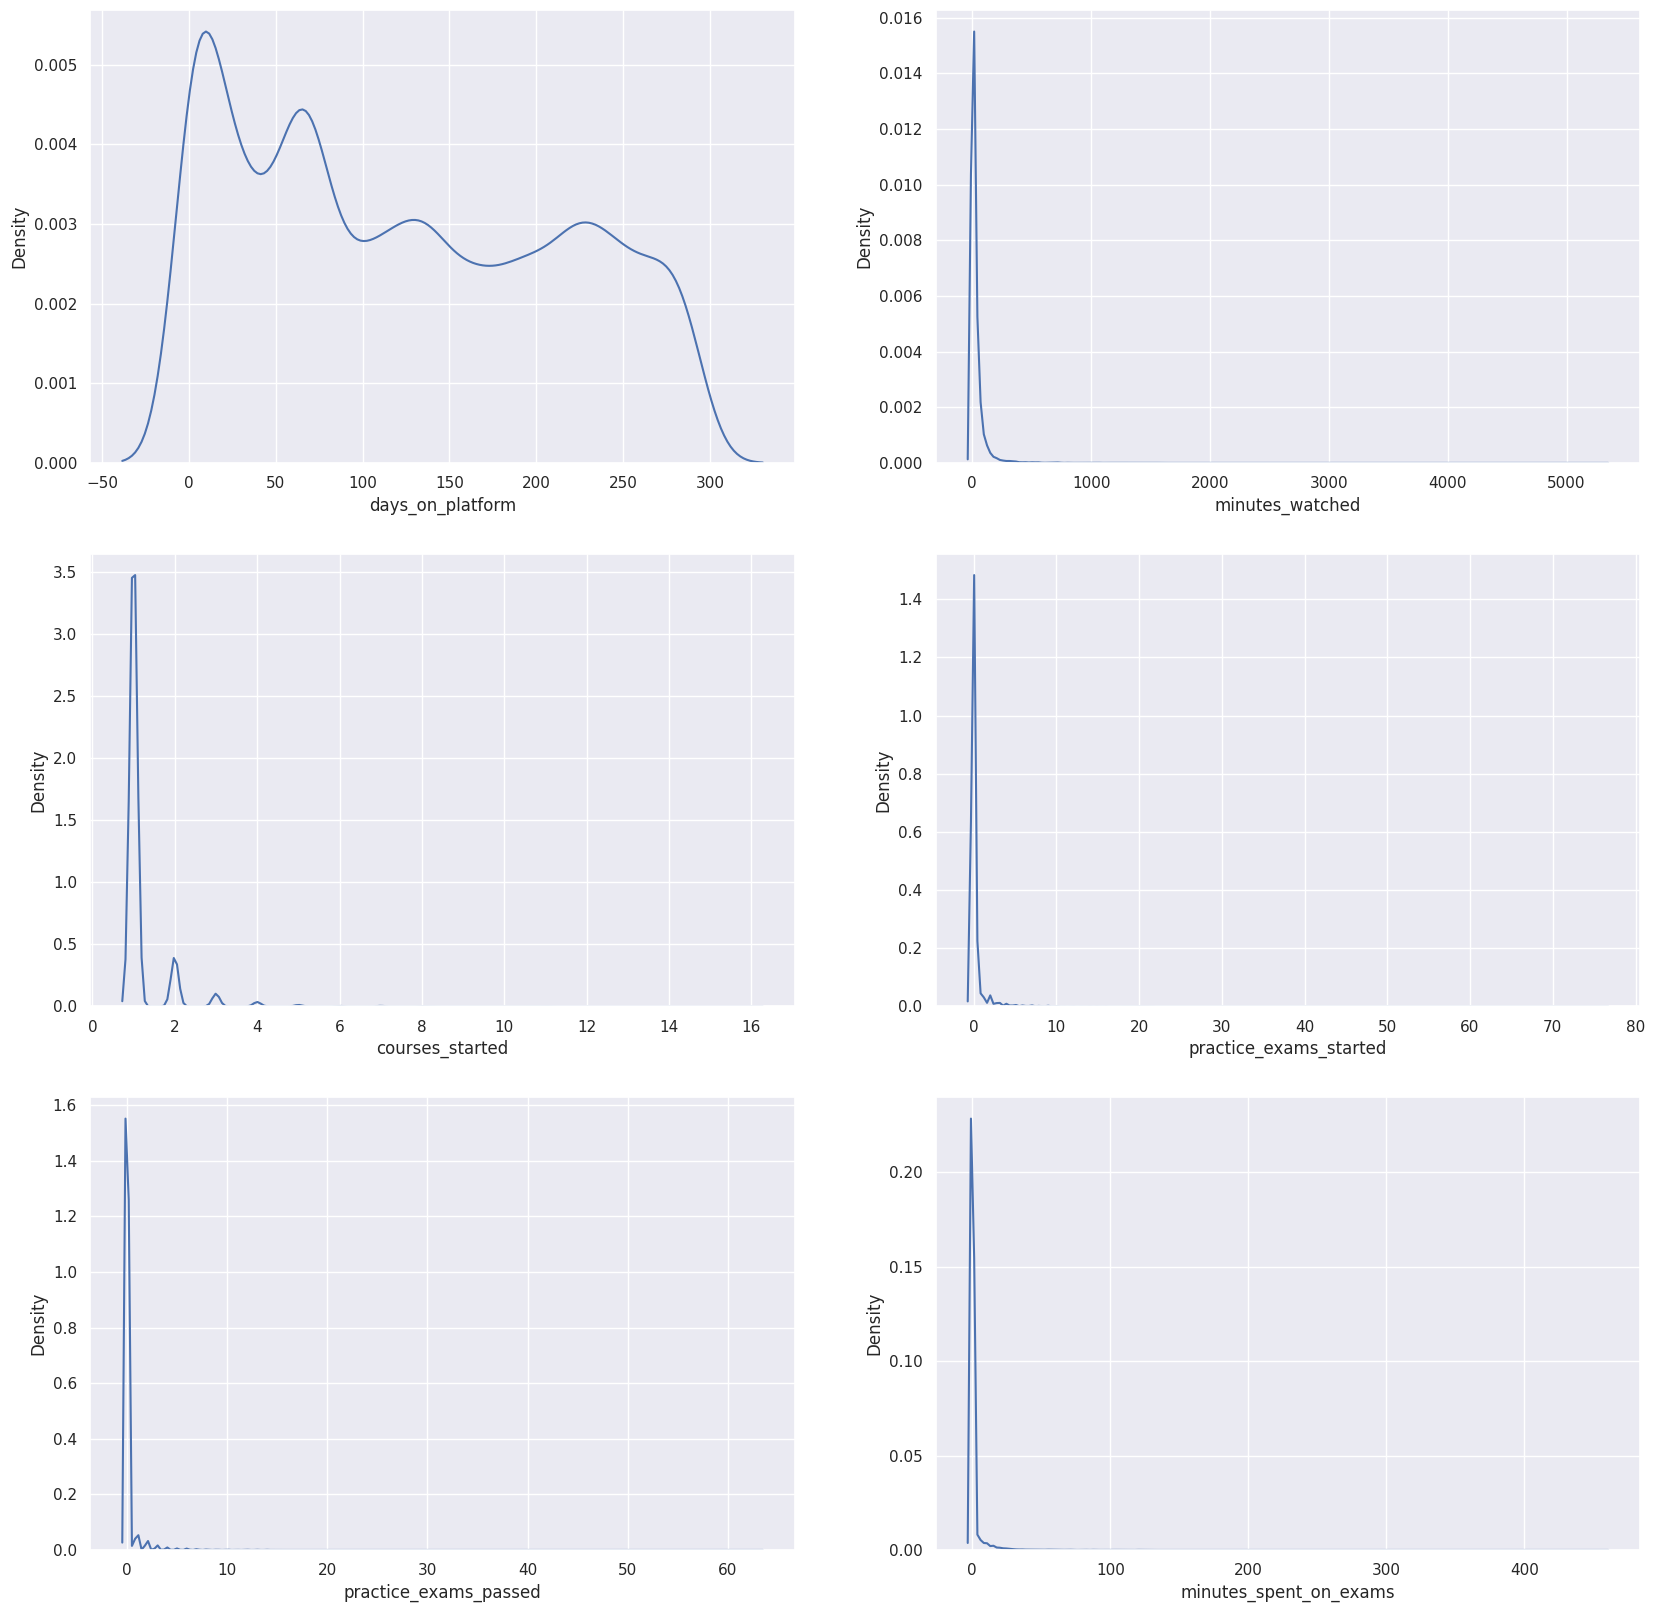

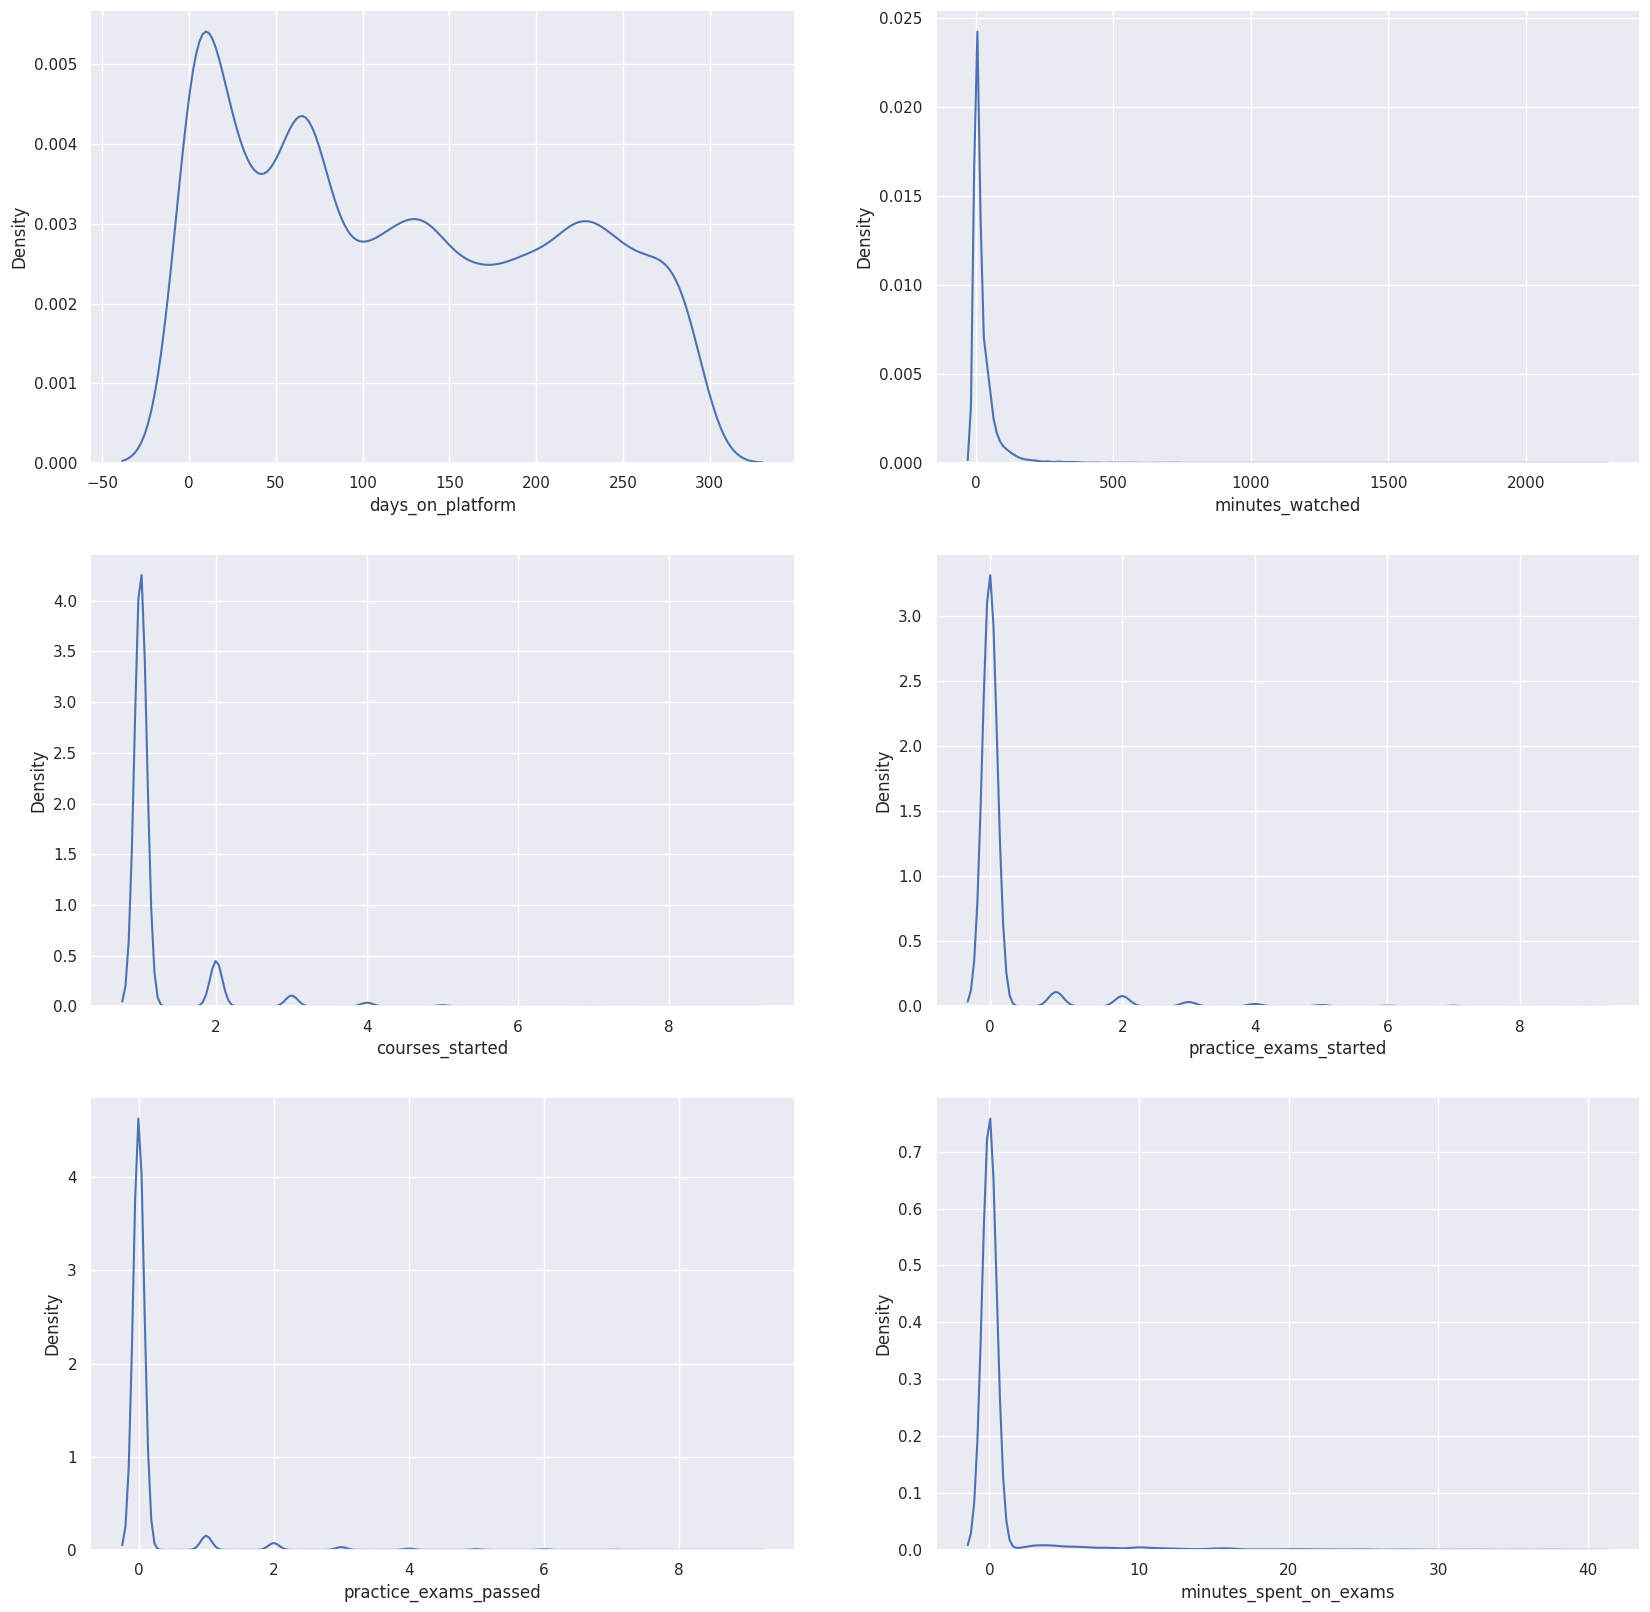

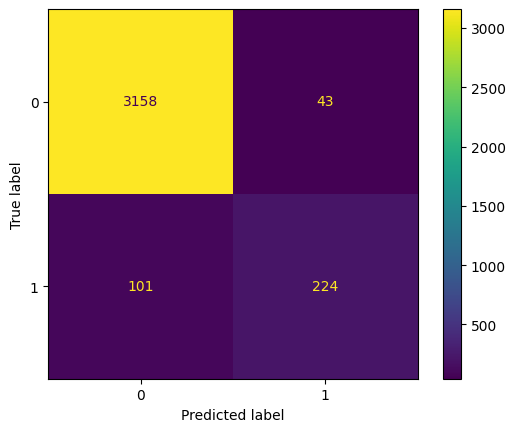

In [129]:
sns.reset_orig()
ConfusionMatrixDisplay = ConfusionMatrixDisplay.from_predictions(y_test_array, log_reg_pred)
plt.show()

In [130]:
print(classification_report(y_test_array, log_reg_pred, target_names = ['Not purchased', 'Purchased']))

               precision    recall  f1-score   support

Not purchased       0.97      0.99      0.98      3201
    Purchased       0.84      0.69      0.76       325

     accuracy                           0.96      3526
    macro avg       0.90      0.84      0.87      3526
 weighted avg       0.96      0.96      0.96      3526



## k- Nearest Neighbors

In [131]:
parameters_knn = {'n_neighbors': range(1, 51), 'weights': ['uniform', 'distance']}

In [132]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(), parameters_knn, scoring = 'accuracy')
grid_search_knn.fit(x_train_array, y_train_array)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [133]:
knn_clf = grid_search_knn.best_estimator_
knn_clf

KNeighborsClassifier(n_neighbors=7)

In [134]:
# Display the best parameters and the corresponding score
grid_search_knn.best_params_, grid_search_knn.best_score_

({'n_neighbors': 7, 'weights': 'uniform'}, 0.9598610723524932)

In [135]:
y_test_pred_knn = knn_clf.predict(x_test_array)

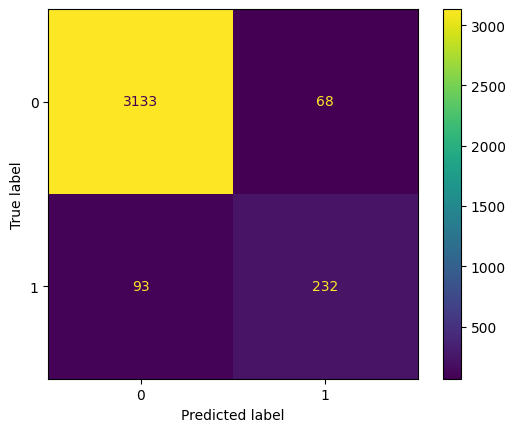

In [136]:
sns.reset_orig()
ConfusionMatrixDisplay = ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_knn)
plt.show()

In [137]:
print(classification_report(y_test_array, y_test_pred_knn, target_names = ['Not purchased', 'Purchased']))


               precision    recall  f1-score   support

Not purchased       0.97      0.98      0.97      3201
    Purchased       0.77      0.71      0.74       325

     accuracy                           0.95      3526
    macro avg       0.87      0.85      0.86      3526
 weighted avg       0.95      0.95      0.95      3526



## SVM implementation

In [138]:
scaler = MinMaxScaler(feature_range = (-1,1))
x_train_array_svm = scaler.fit_transform(x_train_array)
x_test_array_svm = scaler.transform(x_test_array)

In [139]:
parameters_svm = [{'kernel': ['linear'], 'C' : range(1,11)}, 
                  {'kernel': ['poly'], 'C' : range(1,11)}, 
                  {'kernel':['rbf'], 'C' : range(1, 11), 'gamma': ['auto', 'scale']}]

In [140]:
grid_search_svm = GridSearchCV(SVC(), parameters_svm, scoring = 'accuracy')

In [141]:
grid_search_svm_model = grid_search_svm.fit(x_train_array_svm, y_train_array)

In [142]:
# Display the best parameters and the corresponding score
grid_search_svm.best_params_, grid_search_svm.best_score_

({'C': 10, 'kernel': 'poly'}, 0.9609955475775654)

In [143]:
svm_clf = grid_search_svm_model.best_estimator_
svm_clf

SVC(C=10, kernel='poly')

In [144]:
y_test_pred_svm = svm_clf.predict(x_test_array_svm)

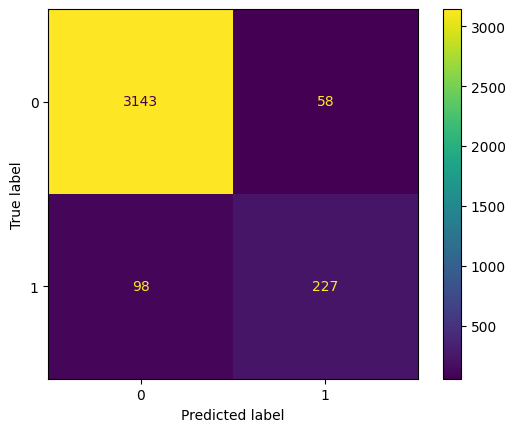

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_svm)
plt.show()

In [146]:
print(classification_report(y_test_array, y_test_pred_svm, target_names = ['Not purchased', 'Purchased']))

               precision    recall  f1-score   support

Not purchased       0.97      0.98      0.98      3201
    Purchased       0.80      0.70      0.74       325

     accuracy                           0.96      3526
    macro avg       0.88      0.84      0.86      3526
 weighted avg       0.95      0.96      0.95      3526



## Implementing Decision Tree Classifier

In [147]:
parameters_DT = {'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]}

In [148]:
grid_search_DT = GridSearchCV(DecisionTreeClassifier(), parameters_DT, scoring = 'accuracy')

In [149]:
grid_search_DT_model = grid_search_DT.fit(x_train_array, y_train_array)

In [150]:
grid_search_DT_model_best = grid_search_DT_model.best_estimator_
grid_search_DT_model_best

DecisionTreeClassifier(ccp_alpha=0.001)

In [151]:
y_test_pred_DT = grid_search_DT_model_best.predict(x_test_array)

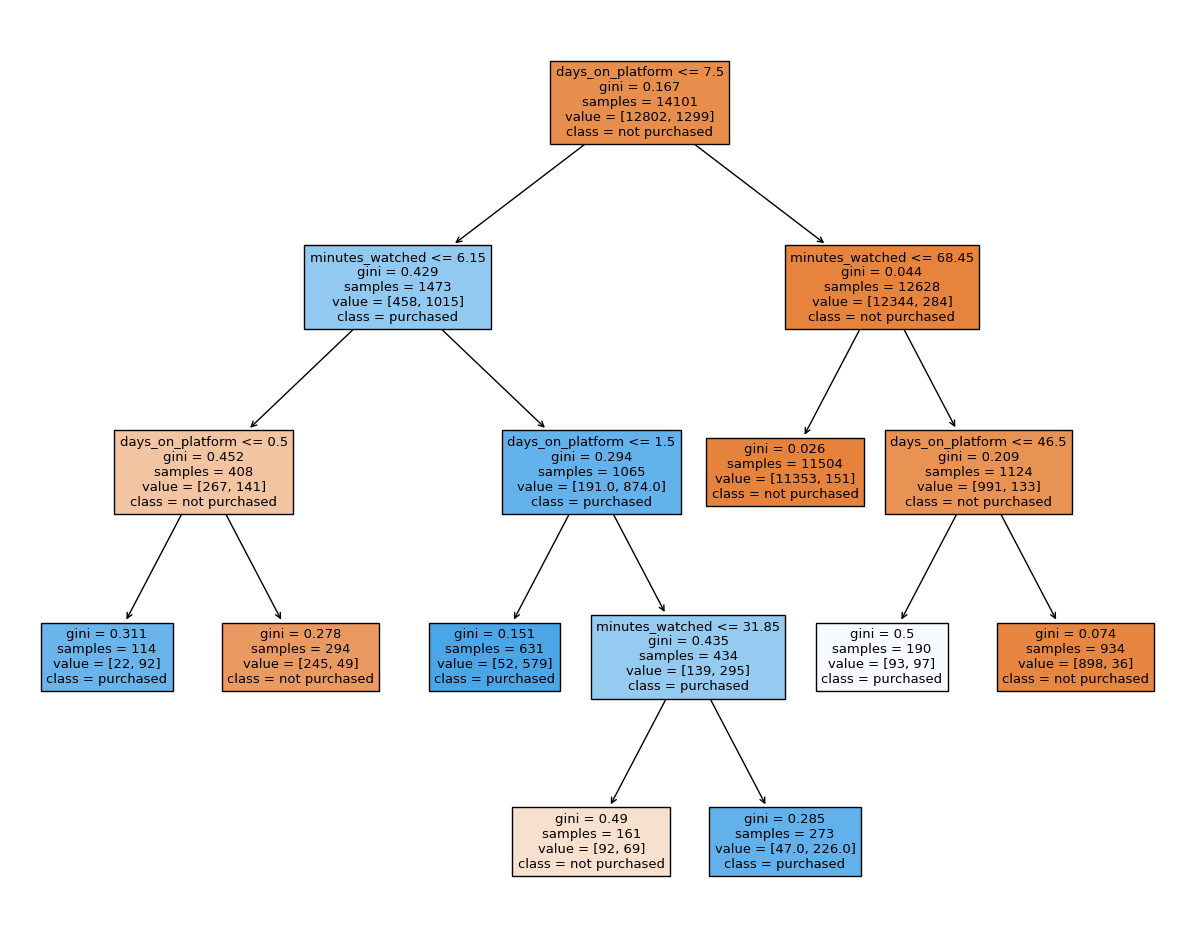

In [152]:
plt.figure(figsize = (15, 12))
plot_tree(grid_search_DT_model_best, filled = True, feature_names = ['days_on_platform', 
                                                                     'minutes_watched', 
                                                                     'courses_started', 
                                                                     'minutes_spent_on_exams',
                                                                     'student_country_enc'], class_names = ['not purchased','purchased'])
plt.show()

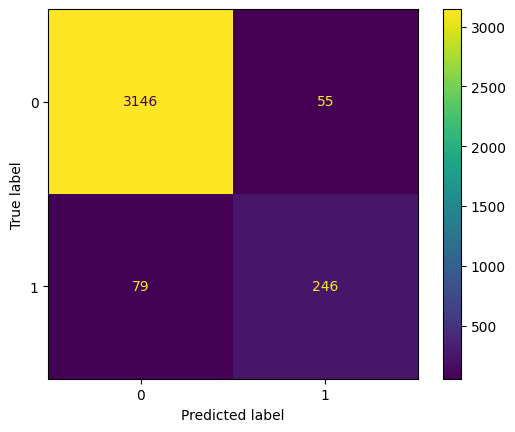

In [153]:
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_DT)
plt.show()

In [154]:
print(classification_report(y_test_array, y_test_pred_DT, target_names = ['Not purchased', 'Purchased']))

               precision    recall  f1-score   support

Not purchased       0.98      0.98      0.98      3201
    Purchased       0.82      0.76      0.79       325

     accuracy                           0.96      3526
    macro avg       0.90      0.87      0.88      3526
 weighted avg       0.96      0.96      0.96      3526



## Random Forest Classifier Implementation

In [155]:
clf_Rf = RandomForestClassifier(ccp_alpha = 0.001, random_state = 365)

In [156]:
clf_Rf_model = clf_Rf.fit(x_train_array, y_train_array)

In [157]:
y_test_pred_Rf = clf_Rf_model.predict(x_test_array)

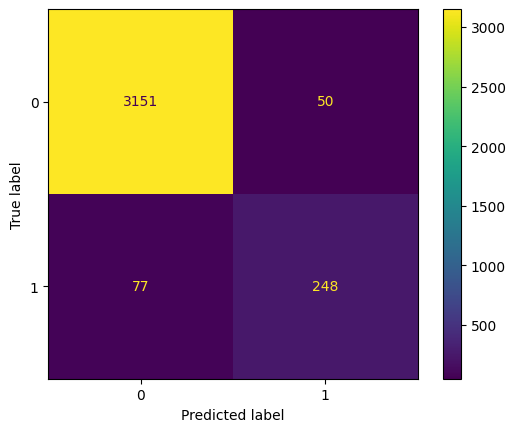

In [158]:
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_Rf)
plt.show()

In [159]:
print(classification_report(y_test_array, y_test_pred_Rf, target_names = ['Not purchased', 'Purchased']))

               precision    recall  f1-score   support

Not purchased       0.98      0.98      0.98      3201
    Purchased       0.83      0.76      0.80       325

     accuracy                           0.96      3526
    macro avg       0.90      0.87      0.89      3526
 weighted avg       0.96      0.96      0.96      3526



### Decision Trees and Random Forests worked well for the given dataset based on F1 score